<a href="https://colab.research.google.com/github/marzaanvan/Coursera-ML-Solutions/blob/master/MNSIT_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello world')

hello world


In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras import keras.datasets

SyntaxError: ignored

In [0]:
from keras.datasets import mnist

In [6]:
#Load Mnist DataSets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt

In [8]:
fig = plt.figure(9)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

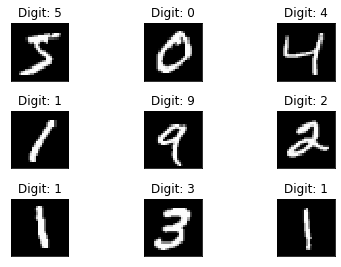

In [9]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
print(X_train[0].shape)

(28, 28)


In [0]:
#IMPORTANT:- Add following lines to the code before importing tensorflow
#from __future__ import absolute_import, division, print_function, unicode_literals
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# MNIST - Digits Dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
## Validating Dataset
print(len(train_images), len(train_labels), sep = ' , ')
print(len(test_images), len(test_labels), sep = ' , ')

60000 , 60000
10000 , 10000


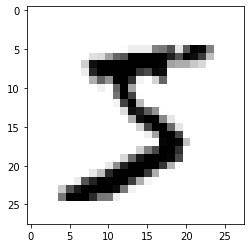

5

In [14]:
# Visualizing Data
plt.imshow(train_images[0], cmap = plt.cm.binary) #cm.binary:- Convert images to
plt.show() # greyscale value
train_labels[0] #Class name of the given

In [0]:
# GeyScale Value <- 0 to 255
## Requ: Scale Down to 0 - 1
train_images = train_images/255.0
test_images = test_images/255.0
## Reshape Data to 3D
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [16]:
# Image Dim
train_images[0].shape

(28, 28, 1)

In [17]:
# Setting up Conv Neural Network

#Flattening Data
#Using Multi-Layer Preceptron (MLP)
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
keras.layers.MaxPooling2D((5, 5)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3, 3), activation='relu'),
keras.layers.AveragePooling2D((3, 3)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (1, 1), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 128)         36992     
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         1

In [19]:
model.compile(optimizer='adam',

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
#epochs:- No of iteration w/ shuffling
#Higbh epochs not necessarily increases accuracy
trained_model = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.5570 - acc: 0.8103 - val_loss: 0.1237 - val_acc: 0.9624
Epoch 2/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.1836 - acc: 0.9413 - val_loss: 0.0900 - val_acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.1297 - acc: 0.9595 - val_loss: 0.0594 - val_acc: 0.9802
Epoch 4/10
60000/60000 [==============================] - 28s 465us/sample - loss: 0.1047 - acc: 0.9675 - val_loss: 0.0446 - val_acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.0904 - acc: 0.9719 - val_loss: 0.0480 - val_acc: 0.9838
Epoch 6/10
60000/60000 [==============================] - 28s 468us/sample - loss: 0.0796 - acc: 0.9751 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 7/10
60000/60000 [==============================] - 28s 471us/sample - loss: 0.0720 - acc: 0.9772 

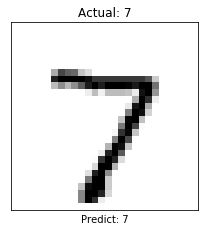

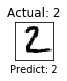

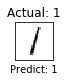

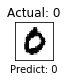

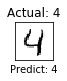

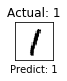

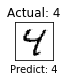

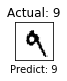

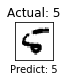

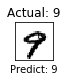

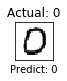

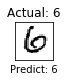

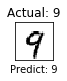

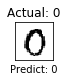

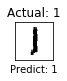

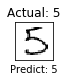

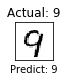

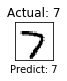

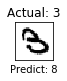

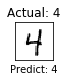

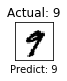

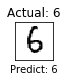

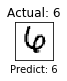

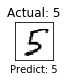

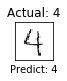

In [21]:
## Sample Test Images
predict = model.predict(test_images)
#print(test_images[i].shape)
plt.figure(figsize=(20,20))
i = 0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(test_images[i]), cmap = plt.cm.binary)
  plt.xlabel("Predict: " + str(np.argmax(predict[i])))
  plt.title("Actual: " + str(test_labels[i]))
  plt.show()

10000/10000 - 1s - loss: 0.0309 - acc: 0.9901


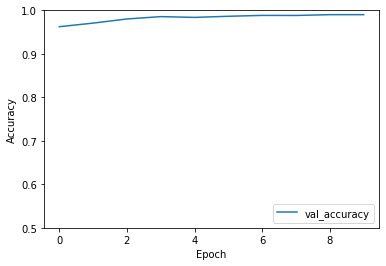

In [29]:
## Testing Accuracy

#plt.plot(trained_model.history['val_acc'], label='accuracy')
plt.plot(trained_model.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#loss and accuracy values
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
